In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [2]:
url="https://www.cars24.com/buy-used-mg-cars-mumbai/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}
req=requests.get(url,headers=headers)
soup=BeautifulSoup(req.content,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <link href="https://assets.cars24.com" rel="preconnect"/>
  <link href="https://media.cars24.com" rel="preconnect"/>
  <link href="https://connect.facebook.net" rel="preconnect"/>
  <link href="https://www.googletagmanager.com" rel="preconnect"/>
  <link href="https://www.google-analytics.com" rel="preconnect"/>
  <link href="https://analytics.twitter.com" rel="preconnect"/>
  <link href="https://www.facebook.com" rel="preconnect"/>
  <link href="https://www.google.com" rel="preconnect"/>
  <link href="https://www.google.co.in" rel="preconnect"/>
  <link href="https://googleads.g.doubleclick.net" rel="preconnect"/>
  <link href="https://t.co" rel="preconnect"/>
  <link href="https://static.ads-twitter.com" rel="preconnect"/>
  <link href="https://tracking.cars24.com" rel="preconnect"/>
  <link href="https://gumi.criteo.com" rel="preconnect"/>
  <link href="https://dynamic.criteo.com" rel="preconnect"/>
  <link href="h

In [3]:
car_cards = soup.find_all('a', class_="styles_carCardWrapper__sXLIp")

In [4]:
cars_data=[]
for card in car_cards:
    try:
        title = card.find('span', class_="sc-braxZu kjFjan").text.strip()
        variant = card.find('span', class_="sc-braxZu fccwQo").text.strip()

        details = card.find_all('p', class_="sc-braxZu kvfdZL")
        km_driven = details[0].text.strip()
        fuel_type = details[1].text.strip()
        transmission = details[2].text.strip()
        owners = details[3].text.strip()

        price = card.find('p', class_="sc-braxZu cyPhJl").text.strip()

        location = card.find('p', class_="sc-braxZu lmmumg").text.strip()

        year_match = re.search(r'\b(19|20)\d{2}\b', title)
        manufacture_year = year_match.group(0) if year_match else None

        cars_data.append({
            "Manufacture Year": manufacture_year,
            "Title": title,
            "Variant": variant,
            "Kilometers Driven": km_driven,
            "Fuel Type": fuel_type,
            "Transmission": transmission,
            "Owners": owners,
            "Price": price,
            "Location": location

        })
    except Exception as e:
          continue

df = pd.DataFrame(cars_data)
from IPython.display import display
display(df)

df.to_csv("/content/mg_cars_mumbai.csv", index=False)

,Manufacture Year,Title,Variant,Kilometers Driven,Fuel Type,Transmission,Owners,Price,Location
0,2023,2023 MG HECTOR PLUS,SHARP PLUS 2.0 D TURBO MT 6STR,29.18k km,Diesel,Manual,1st owner,₹16.90 lakh,"Regency Anantam, Dombivli East"
1,2019,2019 MG HECTOR,SHARP 1.5 DCT PETROL,74.19k km,Petrol,Auto,1st owner,₹10.35 lakh,"Korum Mall, Thane West"
2,2020,2020 MG HECTOR PLUS,SHARP 1.5 PETROL TURBO DCT 6-STR,32.71k km,Petrol,Auto,2nd owner,₹11.90 lakh,"Mulund West, Mumbai"
3,2022,2022 MG HECTOR,SHARP 2.0 DIESEL,22.22k km,Diesel,Manual,1st owner,₹14.40 lakh,"Goregaon, Mumbai"


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("C:/Users/adi33/OneDrive/Desktop/INTERNSHIP/mg_cars_mumbai.csv")

In [6]:
print("First Few rows:")
from IPython.display import display
display(df)

First Few rows:


,Manufacture Year,Title,Variant,Kilometers Driven,Fuel Type,Transmission,Owners,Price,Location
0,2023,2023 MG HECTOR PLUS,SHARP PLUS 2.0 D TURBO MT 6STR,29.18k km,Diesel,Manual,1st owner,₹16.90 lakh,"Regency Anantam, Dombivli East"
1,2019,2019 MG HECTOR,SHARP 1.5 DCT PETROL,74.19k km,Petrol,Auto,1st owner,₹10.35 lakh,"Korum Mall, Thane West"
2,2020,2020 MG HECTOR PLUS,SHARP 1.5 PETROL TURBO DCT 6-STR,32.71k km,Petrol,Auto,2nd owner,₹11.90 lakh,"Mulund West, Mumbai"
3,2022,2022 MG HECTOR,SHARP 2.0 DIESEL,22.22k km,Diesel,Manual,1st owner,₹14.40 lakh,"Goregaon, Mumbai"


In [8]:
print("\n Dataset Info:")
df.info()


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Manufacture Year   4 non-null      int64 
 1   Title              4 non-null      object
 2   Variant            4 non-null      object
 3   Kilometers Driven  4 non-null      object
 4   Fuel Type          4 non-null      object
 5   Transmission       4 non-null      object
 6   Owners             4 non-null      object
 7   Price              4 non-null      object
 8   Location           4 non-null      object
dtypes: int64(1), object(8)
memory usage: 420.0+ bytes


In [9]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Manufacture Year     0
Title                0
Variant              0
Kilometers Driven    0
Fuel Type            0
Transmission         0
Owners               0
Price                0
Location             0
dtype: int64


In [8]:
print("\nStatistical Summary:")
from IPython.display import display
display(df.describe(include='all'))



Statistical Summary:


,Manufacture Year,Title,Variant,Kilometers Driven,Fuel Type,Transmission,Owners,Price,Location
count,4.000000,4,4,4,4,4,4,4,4
unique,NaN,4,4,4,2,2,2,4,4
top,NaN,2023 MG HECTOR PLUS,SHARP PLUS 2.0 D TURBO MT 6STR,29.18k km,Diesel,Manual,1st owner,₹16.90 lakh,"Regency Anantam, Dombivli East"
freq,NaN,1,1,1,2,2,3,1,1
mean,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.825742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2019.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data Cleaning**

In [9]:
# Converting 'Kilometers Driven' like "29.18k km" to integers
df['Kilometers Driven'] = df['Kilometers Driven'].str.lower().str.replace('km', '', regex=False)
df['Kilometers Driven'] = df['Kilometers Driven'].str.replace('k', '000', regex=False)
df['Kilometers Driven'] = df['Kilometers Driven'].str.replace('.', '', regex=False)
df['Kilometers Driven'] = df['Kilometers Driven'].str.replace(',', '', regex=False).astype(int)

In [10]:
# Converting 'Price' like "₹16.90 lakh" to integers
df['Price'] = df['Price'].str.replace('₹', '', regex=False)
df['Price'] = df['Price'].str.replace(' lakh', '', regex=False)
df['Price'] = df['Price'].str.replace(',', '', regex=False).astype(float) * 1_00_000
df['Price'] = df['Price'].astype(int)


In [11]:
# Extracting numeric owner count from "1st owner"
df['Owners'] = df['Owners'].astype(str).str.extract(r'(\d)').astype(int)

In [12]:
# Ensuring 'Manufacture Year' is numeric
df['Manufacture Year'] = pd.to_numeric(df['Manufacture Year'], errors='coerce')

In [14]:
# Show cleaned data
print("\n Cleaned Data Sample:")
from IPython.display import display
display(df)



 Cleaned Data Sample:


,Manufacture Year,Title,Variant,Kilometers Driven,Fuel Type,Transmission,Owners,Price,Location
0,2023,2023 MG HECTOR PLUS,SHARP PLUS 2.0 D TURBO MT 6STR,2918000,Diesel,Manual,1,1689999,"Regency Anantam, Dombivli East"
1,2019,2019 MG HECTOR,SHARP 1.5 DCT PETROL,7419000,Petrol,Auto,1,1035000,"Korum Mall, Thane West"
2,2020,2020 MG HECTOR PLUS,SHARP 1.5 PETROL TURBO DCT 6-STR,3271000,Petrol,Auto,2,1190000,"Mulund West, Mumbai"
3,2022,2022 MG HECTOR,SHARP 2.0 DIESEL,2222000,Diesel,Manual,1,1440000,"Goregaon, Mumbai"


EXPLORATORY DATA ANALYSIS (EDA)
##


## Distribution Plots

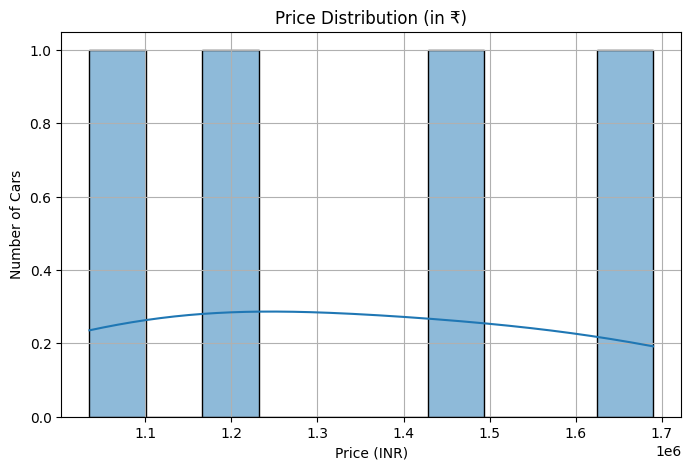

In [16]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=10, kde=True)
plt.title("Price Distribution (in ₹)")
plt.xlabel("Price (INR)")
plt.ylabel("Number of Cars")
plt.grid(True)
plt.show()

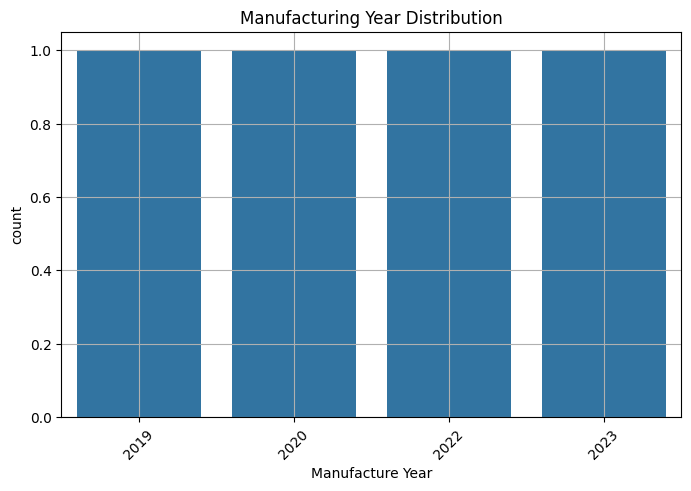

In [17]:
# Year distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Manufacture Year')
plt.title("Manufacturing Year Distribution")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


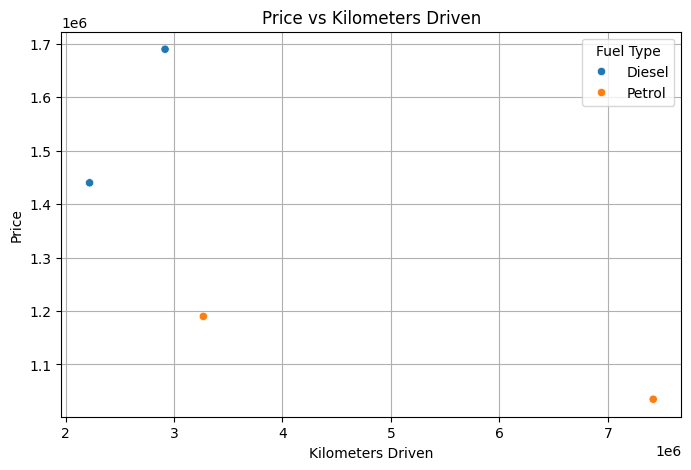

In [18]:
# Kilometers Driven vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Kilometers Driven', y='Price', hue='Fuel Type')
plt.title("Price vs Kilometers Driven")
plt.grid(True)
plt.show()


Categorical Analysis

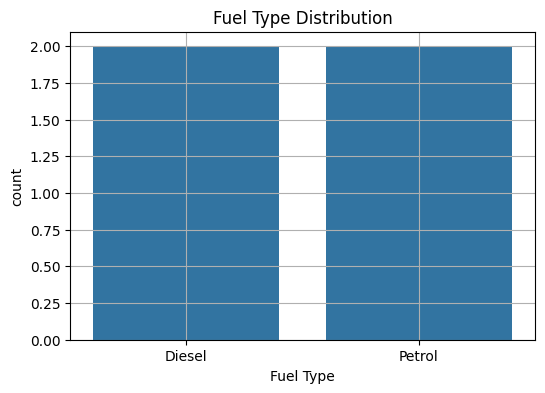

In [19]:
# Fuel type distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Fuel Type')
plt.title("Fuel Type Distribution")
plt.grid(True)
plt.show()


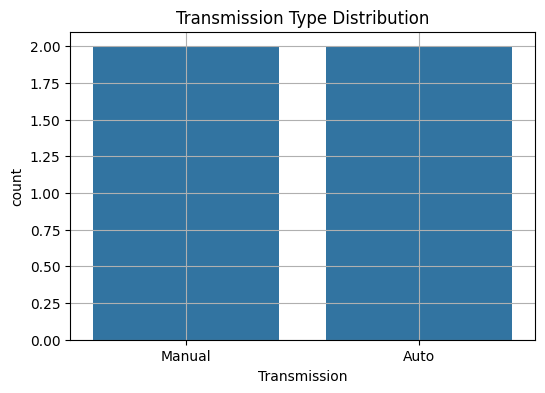

In [20]:
# Transmission distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Transmission')
plt.title("Transmission Type Distribution")
plt.grid(True)
plt.show()


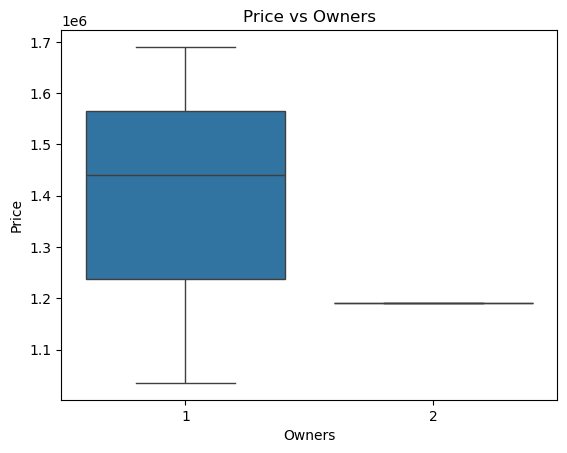

In [ ]:
# Owners vs Price
sns.boxplot(x='Owners', y='Price', data=df)
plt.title("Price vs Owners")
plt.show()

    Correlation Heatmap

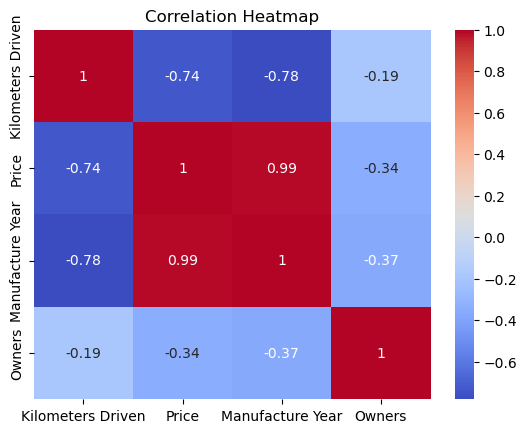

In [18]:
correlation = df[['Kilometers Driven', 'Price', 'Manufacture Year', 'Owners']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Location wise Analysis

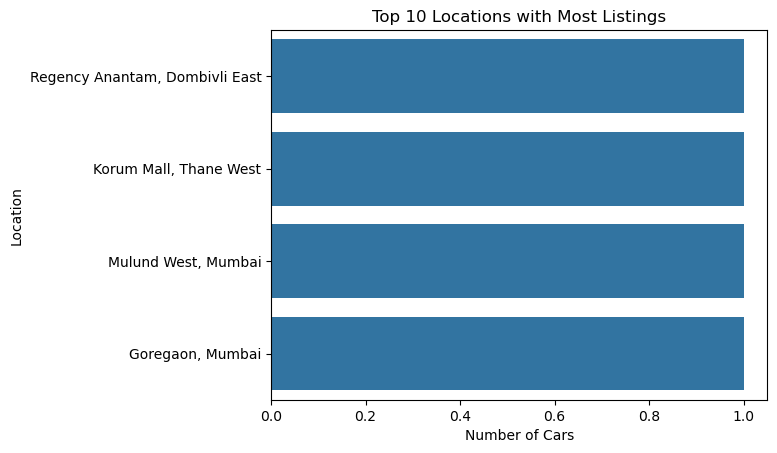

In [19]:
top_locations = df['Location'].value_counts().head(10)

sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("Top 10 Locations with Most Listings")
plt.xlabel("Number of Cars")
plt.ylabel("Location")
plt.show()
